In [40]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams["font.size"] = 18

# In Core Fuel Management

In core fuel management focuses on the study of requirements and operational considerations impacting fuel performance in the reactor core, power history, core loading patterns, and refuelling activities.


## Learning Objectives

At the end of this lesson, you will be equipped to:

- List safety constraints driving in core fuel management decisions.
- Calculate capacity and availability factors.
- Calculate the mass required for each reactor year of operation.
- Calculate core and assembly discharge burnup based on power output.
- Analyze the reactivity evolution of a core based on burnup.
- Apply burnup calculations to multiple batch cores.
- Recognize the relationship between the number of batches and the final burnup. 
- Understand the goals driving choices in various fuel loading patterns. 
- Apply these lessons to pebble-fuelled and liquid-fueled advanced reactor designs.
- Recognize the impact of extended burnup on fuel utilization, SWU utilization, and fuel cycle cost.
- Understand how isotopic activities can be used to determine fuel burnup.
- Calculate burnup based on key activity ratios.

## Safety Constraints


-  $\frac{P_{peak}}{P_{avg}}$, peak to average power ratio.
- $T_{max}$, maximimum core temperature.
- Departure from Nucleate Boiling Ratio (DNBR)
- $\rho$, reactivity in the core.
- $\alpha_T$, temperature coefficient of reactivity 

## Mass Required

The simplest possible representation of the mass of fuel that must be added into a reactor is:

\begin{align}
M(t) &= \frac{Q}{BU}
\end{align}

where
\begin{align}
M &= \mbox{mass of heavy metal (e.g., uranium) in the core }[MTHM/yr]\\
Q &= \mbox{annual thermal energy output }[GWd/yr]\\
BU &= \mbox{burnup }[GWd/MTIHM]
\end{align}


But, Q itself typically needs to be back-calculated from energy produced.

\begin{align}
Q &= \frac{P_0\cdot CF\cdot T}{\eta_{th}}
\end{align}

where
\begin{align}
P_0 &= \mbox{installed electric capacity }[GWe]\\
CF &= \mbox{capacity factor }[-]\\
T &= \mbox{time in core } [days]\\
\eta_{th} &= \mbox{thermal efficiency }[GWe/GWth]\\
\end{align}



In [41]:
def m(q, bu):
    return q/bu

def q(p0, cf, t, eta_th):
    return p0*cf*t/eta_th

p0 = 1500 # installed electric capacity GWe
cf = 0.9 # capacity factor
t = 365 # days per year
eta_th = 0.33 # thermal efficiency GWe/GWth
bu = 50 # burnup GWd/MTIHM

print(m(q(p0, cf, t, eta_th), bu))


29863.636363636364


## Capacity and Availability Factors

The capacity factor is representative of the plant's tendency to acheive its rated power capacity.

\begin{align}
CF &= \frac{\mbox{actual power generated over time T}}{\mbox{rated power potential over time T}}\\
  &=\frac{\int_0^T P(t)dt}{P_0T}\\
P(t) &= \mbox{ thermal power at time t during period T}
\end{align}

The capacity factor, integrated over time, gives Effective Full Power Days (EFPD), the equivalent number of days at full power.

\begin{align}
EFPD &= \int_0^TCF(t)dt\\
     &= \int_0^T \frac{\int_0^T P(t)dt}{P_0T}\\
\end{align}



The availability factor is always greater than the capacity factor. 

\begin{align}
AF &= \frac{\mbox{time during which the reactor was operational during time period T}}{T}
\end{align}



(-0.5, 1.5)

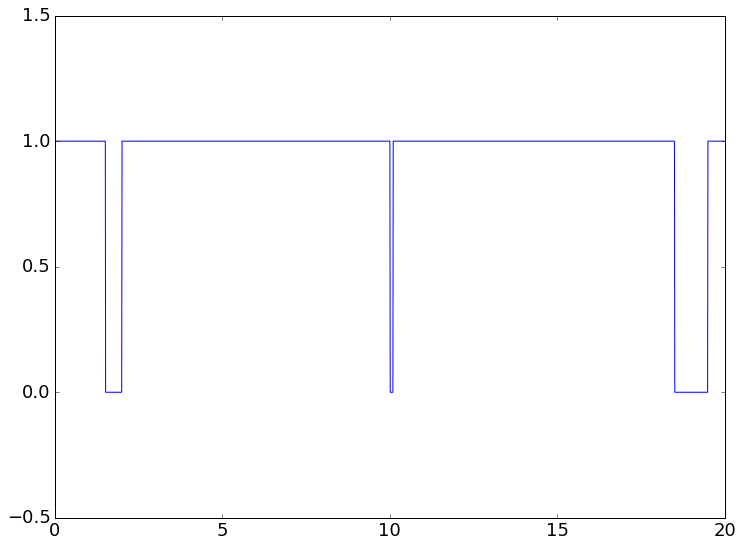

In [53]:
# The reactor shuts down:
# for two weeks starting 1.5 months into the cycle
# for a few days during the 10th month
# for one month during month 18
shutdowns = {1.5:2.0, 
             10:10.1,
             18.5:19.5}

import numpy as np
def A(t, shutdowns):
    to_ret = 1.0*(t > 0)
    for start,stop in shutdowns.items():
        if start < t and t < stop:
            to_ret = 0
    return to_ret

times = np.arange(0.0, 20.0, 0.01)
hist = np.arange(0.0, 20.0, 0.01)
for i in range(0, times.size):
    hist[i] = A(times[i], shutdowns)
plt.plot(times, hist)
plt.ylim([-0.5, 1.5])
plt.set_title()
plt.set_xlabel()
plt.set_ylabel()


## Reactivity Swing





## Multiple Batch Cores


## Fuel Loading Patterns  

## Many and $\infty$ Batch Reactor Designs


## Extended Burnup

## Determining Burnup